# Introduction:


***

The purpose of this project is to examine  factors that can predict the net hourly electrical energy output of the plant. The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. 

**Research Question:**

This study was guided by the research question - Does the cut of a diamond determine its price or are there other factors such as the color or clarity that make a diamond expensive?


**Variables:**

The following factors are used as independent variables:
* **Carat** = weight of the diamond (`0.2–5.01`)
* **Cut** = quality of the cut
>- Fair
>- Good
>- Very Good
>- Premium
>- Ideal
* **Color** = diamond colour, from
>- D (best) to J (worst)
* **Clarity** = a measurement of how clear the diamond is 
>- I1 (worst)
>- SI2, SI1, VS2, VS1, VVS2, VVS1
>- IF (best)

* **Table** = width of top of diamond relative to widest point (`43–95`)
* **Price** = price in US dollars (`$326–$18,823`)
* **x** = length in mm (`0–10.74`)
* **y** = width in mm (`0–58.9`)
* **z** = depth in mm (`0–31.8`)

The dependent variable is:. 
* **Depth** = total depth percentage = z / mean(x, y) = 2 * z / (x + y) (`43–79`)


**Procedures:**

Here are main procedures of the analysis:
- **Part 1**: Load and summarize data
 > For Part 1, Load data:
    > - Get data from GitHub
    > - Load the data
  
- **Part 2**: Perform Exploratory Data Analysis
 > For Part 2, the main components of EDA include:
    > - Understand variables
    > - Clean dataset
    > - Analyze relationships between variables
    > - Graphical analysis
- **Part 3**: Conduct Inference evaluations
 > For Part 3, it consists of 3 stages:
    > -  (1) Construct linear regression models by using different features
    > -  (2) Model evaluation using 5-fold Cross Validation
    > -  (3) Choose the model with the highest average accuracy scores derived from the 5-fold process

- **Part 4**: Conclusion

***

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Data Summary

In this case, Data Summary consist of:
1. Loading data
2. Checking use case data
3. Checking the data types
4. Checking for missing or null values

### 1. Load Data:

In [404]:
# URL to diamonds.csv file on GitHub
filename = "https://raw.githubusercontent.com/CheliMex/CS381_DataAnalytics/refs/heads/main/Quiz1/diamonds.csv"

# Loading the dataset into a Pandas DataFrame
df = pd.read_csv(filename)

# Display the first few rows
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [405]:
# Display the last few rows
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


### 2. How many use cases your data set provides?

In [406]:
# Number of use cases (rows)
num_rows, num_cols = df.shape
print(f"The dataset provides {num_rows} use cases/rows.")

The dataset provides 53940 use cases/rows.


#### How many attributes are in each use case?

In [407]:
# Number of attributes (columns)
print(f"There are {num_cols} attributes/columns in each case.")

There are 11 attributes/columns in each case.


### 3. What are the data types for each of the attributes?

In [408]:
# Data types for each attribute
print("Count for each Data type:\n")
# Checking the data type
df.dtypes.value_counts()

Count for each Data type:



float64    6
object     3
int64      2
Name: count, dtype: int64

### 4. Are there any missing or null values?

In [409]:
# Nulls for each attribute
print("Null data for each attribute:\n")
df.isnull().sum()

Null data for each attribute:



Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### Recap:

* Number of Use Cases and Attributes:
    > The diamonds dataset contains 53940 individual diamond records, each representing a unique use case. For each of these records, 10 distinct attributes are provided but if we include the first column then there a total of 11 attributes/rows.

* Attribute Data Types:
    > The data types for each attribute that consist mostly of numbers are:<br>
         > - 2 int64 attributes<br>
         > - 6 float64 attributes

    > Data types that describe the diamond's quality are: <br>
        > - 3 Object attributes

    > Opinion on changes to data types:
        > - Price should be a float instead int

  
* Missing Values:
    > If any column shows a count more than 0, it would indicates that there are missing values. For the diamonds dataset, we observe that there are no missing values based on above data shown in section 4.

*** 

## Part 2: Exploratory Data Analysis (EDA)

In this case, the procedures of Exploratory Data Analysis consist of:

1. Description of data
2. Rename the columns
3. Detect and remove Outliers
4. Check distribution
5. Analyze relationships between variables

### 1. Description of data - Summary Statistics:

In [410]:
#Summary Statistics for Numerical Attributes
print("--- Summary Statistics for Numerical Attributes ---")
print(df.describe())

--- Summary Statistics for Numerical Attributes ---
         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000   

In [411]:
print("--- Summary Statistics for Categorical Attributes ---")
# For categorical columns shows count, unique, top, and freq for object type
print(df.describe(include='object'))


--- Summary Statistics for Categorical Attributes ---
          cut  color clarity
count   53940  53940   53940
unique      5      7       8
top     Ideal      G     SI1
freq    21551  11292   13065


**Reminder**
- Cut = quality of the cut
>- Fair
>- Good
>- Very Good
>- Premium
>- Ideal
- Color = diamond color
>- D (best) to J (worst)
- Clarity = a measurement of how clear the diamond is
>- I1 (worst)
>-  SI2, SI1, VS2, VS1, VVS2, VVS1
>-  IF (best)


In [412]:
# Unique values and their counts for categorical columns
print("--- Value Counts for Categorical Attributes ---")
for col in df.select_dtypes(include='object'):
    print("\nValue counts for:")
    print(df[col].value_counts())

--- Value Counts for Categorical Attributes ---

Value counts for:
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

Value counts for:
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

Value counts for:
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


#### Explanation of the output:

* **For Numerical Attributes (`df.describe()`):**
    * `count`: Number of non-null observations.
    * `mean`: The average value.
    * `std`: The standard deviation, which measures the amount of variation or dispersion.
    * `min`: The minimum value.
    * `25%, 50% (median), 75%`: The quartiles, which divide the data into four equal parts.
    * `max`: The maximum value.

* **For Categorical Attributes (`df.describe(include='object')`):**
    * `count`: Number of non-null observations if < 53940
    * `unique`: Number of distinct categories.
    * `top`: The most frequent category.
    * `freq`: The frequency of the top category.

* **For Categorical Attributes (`.value_counts()`):**
    * This shows each unique category within a column and how many times it appears in the dataset, which is very useful for understanding the distribution of categorical data.

### 2. Renaming the columns

In [413]:
# Renaming the column names
new_df = df.rename(columns={
    'Unnamed: 0': 'Item #',
    'carat': 'Carat',
    'cut': 'Cut',
    'color': 'Color',
    'clarity': 'Clarity',
    'table': 'Widest_Point',
    'price': 'Price',
    'x': 'Length',
    'y': 'Width',
    'z': 'Depth',
    'depth': 'Total_Depth'
})

new_df.head(5)

,Item #,Carat,Cut,Color,Clarity,Total_Depth,Widest_Point,Price,Length,Width,Depth
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 3. Graphs/Plots:
    1. Using Matpltlib
    2. Using Seaborn
    3. Explanation of the Graphs/Plots

#### 1. Using Matplotlib:


--- Bar Plot of Diamond Color (Matplotlib) ---


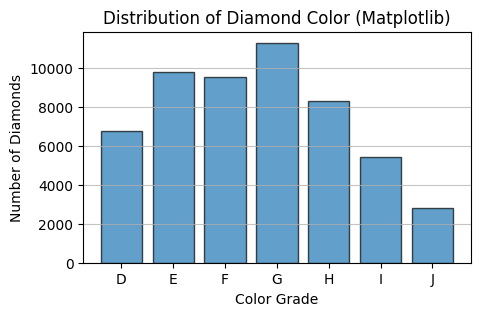

In [414]:
print("\n--- Bar Plot of Diamond Color (Matplotlib) ---")

# Set the figure size
plt.figure(figsize=(5, 3))

# Define the order for categorical plots to follow diamond grading best to worst
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
color_counts = new_df['Color'].value_counts().reindex(color_order)

plt.bar(color_counts.index, color_counts.values, edgecolor='black', alpha=0.7)

plt.title('Distribution of Diamond Color (Matplotlib)')
plt.xlabel('Color Grade')
plt.ylabel('Number of Diamonds')
plt.grid(axis='y', alpha=0.75)


--- Bar Plot of Diamond Clarity (Matplotlib) ---


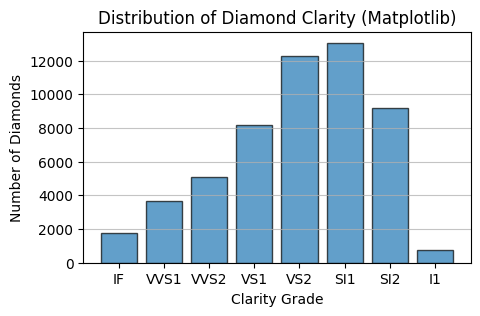

In [415]:
print("\n--- Bar Plot of Diamond Clarity (Matplotlib) ---")

# Set the figure size
plt.figure(figsize=(5, 3))

# Define the order for clarity grades from best to worst
clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
clarity_counts = new_df['Clarity'].value_counts().reindex(clarity_order)

plt.bar(clarity_counts.index, clarity_counts.values, edgecolor='black', alpha=0.7)

plt.title('Distribution of Diamond Clarity (Matplotlib)')
plt.xlabel('Clarity Grade')
plt.ylabel('Number of Diamonds')
plt.grid(axis='y', alpha=0.75)

#### 2. Using Seaborn:


--- Bar Plot of Diamond Color (Seaborn) ---


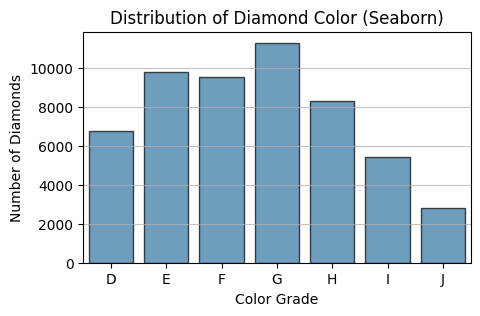

In [416]:
print("\n--- Bar Plot of Diamond Color (Seaborn) ---")

# Set the figure size
plt.figure(figsize=(5, 3))
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

sns.countplot(x='Color', data=new_df, order=color_order, edgecolor='black', alpha=0.7)

plt.title('Distribution of Diamond Color (Seaborn)')
plt.xlabel('Color Grade')
plt.ylabel('Number of Diamonds')
plt.grid(axis='y', alpha=0.75) # Add grid for better readability



--- Histogram of Carat (Seaborn) ---


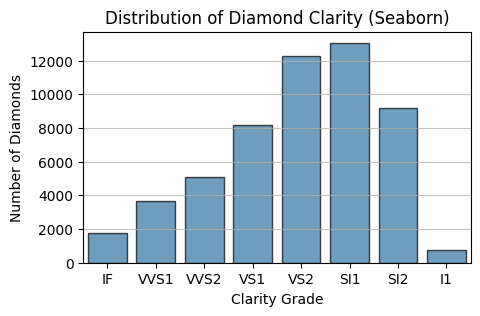

In [417]:
print("\n--- Histogram of Carat (Seaborn) ---")

# Set the figure size
plt.figure(figsize=(5, 3))

# Define the order for clarity grades from best to worst
clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

sns.countplot(x='Clarity', data=new_df, order=clarity_order, edgecolor='black', alpha=0.7)

plt.title('Distribution of Diamond Clarity (Seaborn)')
plt.xlabel('Clarity Grade')
plt.ylabel('Number of Diamonds')
plt.grid(axis='y', alpha=0.75)

#### 3. Explanation of the plots:

* These bar plots show the absolute frequency of each diamond color grade and diamond clarity grade..
    *  You'll be able to see which color grades are most common in the dataset and which are less frequent.
    *  The order parameter helps in presenting the categories logically (from best 'D' to worst 'J' color).
    *  You'll be able to quickly see which clarity grades are most abundant in the dataset and how the counts change across the different purity levels.

## Part 3: Inferences

### 1. What proportion of diamonds are between .30 and 1.08 carats?

- To determine the proportion of diamonds with a carat value between 0.30 and 1.08, we first filtered the dataset to and  then count the number of diamonds. We then dividie this count by the total number of diamonds.

In [418]:
# Filter diamonds within the specified carat range
diamonds_in_range = new_df[(new_df['Carat'] >= 0.30) & (new_df['Carat'] <= 1.08)]

# Count the number of diamonds in the range
count_in_range = len(diamonds_in_range)

# Get the total number of diamonds
total_diamonds = len(new_df)

# Calculate the proportion
proportion = count_in_range / total_diamonds

print(f"Proportion of diamonds between 0.30 and 1.08 carats: {proportion}")
print(f"Number of diamonds between 0.30 and 1.08 carats: {count_in_range}")
print(f"Total number of diamonds: {total_diamonds}")


Proportion of diamonds between 0.30 and 1.08 carats: 0.7468298109010011
Number of diamonds between 0.30 and 1.08 carats: 40284
Total number of diamonds: 53940


**Findings:**
- The analysis shows that `40,284` diamonds out of a total of `53,940` fall within this carat range.
- This results in a proportion of approximately `0.7468`.
- This indicates that a significant of diamonds are within this common size category.

### 2. How many of the diamonds have equal x and y dimensions?
- To find out how many diamonds have equal `x` and `y` dimensions, now known as `Length` and `Width`, we performed a direct comparison between the dataset.
- We filtered the DataFrame to include only those rows where the value in the x column was identical to the value in the y column.

In [419]:
# Filter for diamonds where x dimension equals y dimension
equal_dimension = new_df[new_df['Length'] == new_df['Width']]

# Count the number of such diamonds
count_diamonds = len(equal_dimension)

print(f"Number of diamonds with equal x and y dimensions: {count_diamonds}")

Number of diamonds with equal x and y dimensions: 17


**Findings:**

- The analysis reveals that `17` diamonds have identical x and y dimensions. 
- If 'x' or 'y' dimensions are zero, this would mean that there are missing or invalid data points, but that is not our case with the dataset I have.

### 3. How many of the diamonds have a carat value that is less than the mean carat value?
- To determine the number of diamonds with a carat value less than the mean carat value, we first nned to calculate the overall average carat of all diamonds in the dataset.

In [420]:
# Calculate the mean carat value
mean_carat = new_df['Carat'].mean()

# Filter for diamonds with carat value less than the mean
less_mean_carat = new_df[new_df['Carat'] < mean_carat]

# Count the number of such diamonds
count_less_mean_carat = len(less_mean_carat)

print(f"Mean carat value: {mean_carat}")
print(f"Number of diamonds with carat value less than the mean: {count_less_mean_carat}")

Mean carat value: 0.7979397478680014
Number of diamonds with carat value less than the mean: 31127


**Findings:**
- The mean carat value was found to be approximately `0.7979`.
- We filtered the DataFrame to select only those diamonds whose carat attribute was strictly less than this calculated mean. The count of these diamonds provides the answer to the question.

- The analysis shows that `31,127` diamonds have a carat value that is less than the mean carat value of the dataset.
- Given that carat distributions usually have more smaller diamonds than larger ones, it's common to find more data points below the mean than above it.

### 4. How many diamonds have a Premium cut or better?

* To determine the amount of diamonds with a 'Premium' cut or better, we first remember the cut categories based on the following:
    *  Fair
    *  Good
    *  Very Good
    *  Premium
    *  Ideal


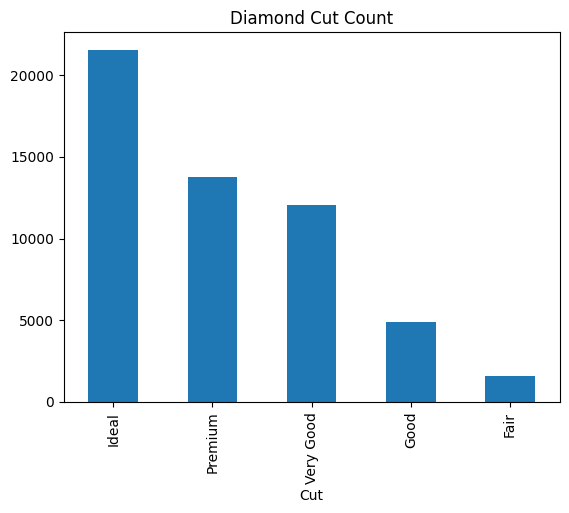

In [421]:
bplt = new_df['Cut'].value_counts().plot.bar(title = "Diamond Cut Count")

In [422]:
# Define the cut qualities that are "Premium or better"
premium_or_better = ['Premium', 'Ideal']

# Filter for diamonds with 'cut' quality that is Premium or Ideal
premium_or_better_cut = df[df['cut'].isin(premium_or_better)]

# Count the number of such diamonds
count_premium_or_better_cut = len(premium_or_better_cut)

print(f"Number of diamonds with a Premium cut or better: {count_premium_or_better_cut}")

Number of diamonds with a Premium cut or better: 35342


**Findings:**
- The analysis reveals that `35,342` diamonds have a `Premium` cut or better.
- This show that a considerable amount of the diamonds are of high cut quality, which usually means better brilliance and sparkle.

### 5. Which diamond has the highest price per carat? What is its value?
- To find which diamond has the highest price per carat, we first need to calculate a new attribute. I will call it price_per_carat.
- This will be done by dividing the price of each diamond by its carat value.
- Once this new attribute is created, we can then find the max value and then we can find the diamond(s) associated with that max

In [423]:
# Calculate price per carat
new_df['price_per_carat'] = new_df['Price'] / new_df['Carat']

# Find the maximum price per carat
max_price_per_carat_value = new_df['price_per_carat'].max()

# Find the row(s) corresponding to the highest price per carat
highest_price_per_carat_diamond = new_df[new_df['price_per_carat'] == max_price_per_carat_value]

print(f"The highest price per carat value is: {max_price_per_carat_value}")
print("\nDiamond(s) with the highest price per carat:")
# Display all columns for the diamond(s) with the highest price per carat
print(highest_price_per_carat_diamond)

The highest price per carat value is: 17828.846153846152

Diamond(s) with the highest price per carat:
       Item #  Carat        Cut Color Clarity  Total_Depth  Widest_Point  \
27635   27636   1.04  Very Good     D      IF         61.3          56.0   

       Price  Length  Width  Depth  price_per_carat  
27635  18542    6.53   6.55   4.01     17828.846154  


**Findings:**

- The analysis shows that the highest price per carat observed in the dataset is `17,828.846`. The diamonds corresponding to this value has the following characteristics:

    * Item Number = 27636
    * Max Price = 17828.84
    * Carat = 1.04
    * Cut = Very Good
    * Color = D
    * clarity = IF
    * Price = 18542
    * Price_per_carat = 17,828.84

- This diamond represents the most expensive per unit of weight within this dataset, which can be influenced by a combination of high quality attributes (cut, color, clarity)

### 6. Using both Matplolib and Seaborn, make boxplots of the diamond price for each distinct cut value and discuss any conclusions you can draw from the appearance of the boxplots.
-  These plots allow us to examine the distribution of prices across each distinct cut category.



--- Box Plot of Price by Cut (Matplotlib) ---


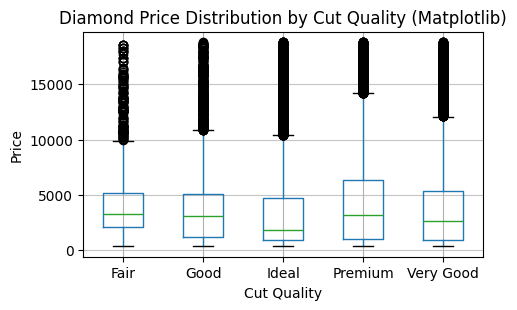

In [424]:
print("\n--- Box Plot of Price by Cut (Matplotlib) ---")
# A more direct way 
new_df.boxplot(column='Price', by='Cut', figsize=(5, 3))

plt.title('Diamond Price Distribution by Cut Quality (Matplotlib)')
plt.suptitle('') # Suppress the default suptitle created by .boxplot()
plt.xlabel('Cut Quality')
plt.ylabel('Price')
plt.grid(axis='y', alpha=0.75)


--- Box Plot of Price by Cut (Seaborn) ---


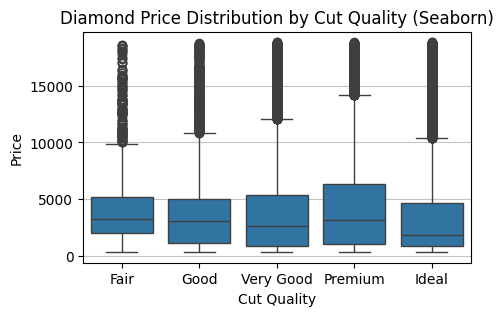

In [425]:
print("\n--- Box Plot of Price by Cut (Seaborn) ---")

# Set the figure size
plt.figure(figsize=(5, 3))

sns.boxplot(x='Cut', y='Price', data=new_df, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

plt.title('Diamond Price Distribution by Cut Quality (Seaborn)')
plt.xlabel('Cut Quality')
plt.ylabel('Price')
plt.grid(axis='y', alpha=0.75)

**Findings:**

* **By comparing the box plots for different cut qualities, you can observe:**
    * How the median price varies across different cuts.
    * The spread of prices within each cut quality (by the length of the box).
    * The presence and extent of outliers (extremely high or low prices for a given cut).
    * Can see whether higher quality cuts tend to have higher prices or a wider range of prices.

* **Median Price Trend:**
    * We can observe that the median line within each box the median `price` generally increase, as the cut quality improves from `Fair` to `Ideal`.

* **Overall Price Distribution:**
    * We can observe that the wiskers go from long to short as the cut quality improves.

* **Outliers:**
    * We can observe that there is a lot of outliers in all cut but more there are more outliers in 'Fair' and 'Ideal' cuts.
    * We see unusually high-priced outliers in the `Fair` cut category, this suggests that despite having a poor cut quality, these specific diamonds command a much higher price. Which could be due to its weight, color or clarity.
    * We see high-priced outliers in the `Ideal` cut category, where its likely that they are large diamonds or almost perfect diamonds. Meaning it has the better standard for all attributes.
    * If I removing the outliers then it would mean I'm losing information.

* **General Observation:**
    * We can observe that while the median price tends to increase with cut quality, there's a significant overlap in the price ranges, especially for very high-quality cuts.

### 7. Using both Matplolib and Seaborn, make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?


--- Scatter Plot of Price vs. Carat (Matplotlib) ---


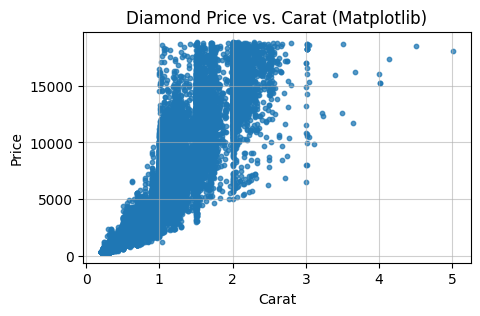

In [426]:
print("\n--- Scatter Plot of Price vs. Carat (Matplotlib) ---")

# Set the figure size
plt.figure(figsize=(5, 3))

# s for size of points
plt.scatter(new_df['Carat'], new_df['Price'], alpha=0.75, s=10) 

plt.title('Diamond Price vs. Carat (Matplotlib)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True, alpha=0.6)


--- Scatter Plot of Price vs. Carat (Seaborn) ---


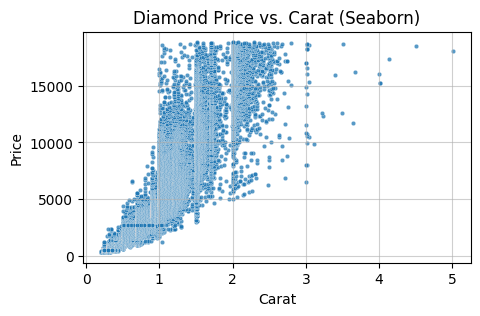

In [427]:
print("\n--- Scatter Plot of Price vs. Carat (Seaborn) ---")

# Set the figure size
plt.figure(figsize=(5, 3))

sns.scatterplot(x='Carat', y='Price', data=new_df, alpha=0.75, s=10) 
plt.title('Diamond Price vs. Carat (Seaborn)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True, alpha=0.6)

**Findings:**

 
* **Direction of Relationship (Correlation):**
    * We can observe that the plots start from bottom left in a small cluster branch up and to the right.
    * This indicates a positive correlation, meaning as carat increases, price also tends to increase.

* **Strength of Relationship:**
    * We can observe that the points cluster between 1 and 2 ranginf from price 5000 to 15000. It started as a tight band, meaning there was a strong correlation, but then it started to widely scattered, making it weaker.
    * We can observe a relatively strong relationship, even though its not perfectly linear.

* **Form of Relationship:**
    * The relationship appear to be a mix of linear and curved.
    * I would says it curvilinear due to price increases at an accelerating rate with carat.

* **Presence of Outliers or Clusters:**
    * We can observe that there are a few point that deviate from the main trend, that start at Carat >3 with price >15000.

* **Overall Conclusion for the relationship:**
    * There's a strong, positive relationship between diamond price and carat, this means that the carat weight is a primary driver of a diamond's price.

## Part 4: Conclusion

This project aimed to perform an exploratory data analysis on a dataset of nearly 54,000 diamonds.

Our initial data summary revealed a comprehensive dataset of 53,940 diamonds with 11 attributes with no missing values.

Through exploratory data analysis, we observed several key characteristics of the diamond attributes. 
For example, the distribution of `Carat` was found to be right-skewed, indicating a higher frequency of smaller diamonds.

The analysis of categorical attributes like `cut`, `color`, and `clarity` revealed that `Ideal` was the most common cut, while `G` was the most common color grade.
Our box plots of `price` by `cut` demonstrated a clear positive trend where the median price generally increased with the cut quality, although we saw how price ranges and outliers were observed particularly in `Fair` and `Ideal` cuts.

Our specific inferences further solidified these observations. We found that a good amount of diamonds fell within the 0.30 to 1.08 carat range. Furthermore, the scatter plot of `price` versus `carat` clearly showed a strong, positive, and non-linear correlation, showing `carat` as a dominant factor in determining the price of a diamond.

In conclusion, this analysis shows that the `color`, `clarity` and other factors are indeed crucial for the pricing of diamonds using the provided dataset in this document.

## Part 5: References

* **Diamonds Dataset Description:**
    * https://ggplot2.tidyverse.org/reference/diamonds.html
* https://keyzarjewelry.com/blogs/diamonds-education/sparkle
* https://www.diamonds.pro/education/cuts/
  * https://www.diamonds.pro/education/cuts/#Diamond-Cut-Grade-Chart 
  * https://www.diamonds.pro/education/cuts/#Prices-for-Different-Diamond-Cuts
  * https://www.diamonds.pro/education/cuts/#Factors-that-Affect-a-Diamonds-Cut
- https://diamondbuzz.blog/diamond-fire-brilliance-and-scintillation/


* **Pandas Documentation:**
    * https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/

* **Matplotlib Documentation:**
    * https://matplotlib.org/stable/](https://matplotlib.org/stable/

* **Seaborn Documentation (if used):**
    * https://seaborn.pydata.org/](https://seaborn.pydata.org/